In [2]:
using DataFrames, Gadfly, CSV, Plots, IJulia;

ArgumentError: Module Hiccup not found in current path.
Run `Pkg.add("Hiccup")` to install the Hiccup package.


In [25]:
raw = readtable("2018-05-21-1754.csv");
default(size = (1000, 600))
raw[:nodes] = raw[:node1_consumers] + raw[:node2_consumers]
raw[:time_ms] = raw[:time_ns] ./ 1000000
raw


,time_ns,n,partition_ancestors,node1_consumers,node2_consumers,chunks,nodes,time_ms
1,11842098906,900000,1,1,1,2000,2,11842.098906
2,11139279237,900000,1,1,1,2000,2,11139.279237
3,9958249349,900000,1,1,1,2000,2,9958.249349
4,9925724161,900000,1,1,1,2000,2,9925.724161
5,9153815363,900000,1,1,1,2000,2,9153.815363
6,9589922415,900000,1,1,1,2000,2,9589.922415
7,4754269491,900000,1,1,0,2000,1,4754.269491
8,11024398726,900000,1,1,0,2000,1,11024.398726
9,9555638981,900000,1,1,0,2000,1,9555.638981
10,9863877632,900000,1,1,0,2000,1,9863.877632


In [ ]:
# example test set

# Random r = new Random();
# 		List<PointImpl> points = new ArrayList<PointImpl>();
# 		double delta = 30 / (double) numberOfPoints;
# 		for (int j = 0; j < numberOfPoints; j++) {
# 			float rf = r.nextFloat();
# 			double i = j * delta;
# 			double y = ((60 * rf) * i - Math.pow(i, 2)) * Math.cos((2 * Math.PI) * i) - (60 * rf);
# 			points.add(new PointImpl(j, y));
# 		}
p(i,j) = ((60 * j) * i - i ^ 2) * cos((2 * pi) * i) - (60 * j);

df = DataFrame()
df[:i] = 1:900000
df[:j] = p.(df[:i], rand(1))
Gadfly.plot(df, x=:i,y=:j, Geom.point)

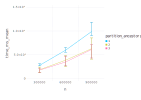

In [44]:
# fairly standard O(n log n)
data = deepcopy(raw)
# data = data[(data[:split].==split),:]
data = data[(data[:nodes].==2),[:n,:time_ms, :partition_ancestors]]
data = aggregate(data, [:partition_ancestors, :n], [ mean, maximum, minimum])

Gadfly.plot(data, x=:n, y=:time_ms_mean, color=:partition_ancestors, ymin=:time_ms_minimum, ymax=:time_ms_maximum, Geom.line, Geom.errorbar, Scale.x_discrete, Scale.color_discrete)

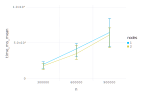

In [39]:
# fairly standard O(n log n)
data = deepcopy(raw)
# data = data[(data[:split].==split),:]
data = data[(data[:nodes].==2),[:n,:time_ms, :partition_ancestors]]
data = aggregate(data, [:partition_ancestors, :n], [ mean, maximum, minimum])

Gadfly.plot(data, x=:n, y=:time_ms_mean, color=:partition_ancestors, ymin=:time_ms_minimum, ymax=:time_ms_maximum, Geom.line, Geom.errorbar, Scale.x_discrete, Scale.color_discrete)

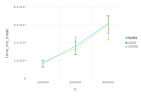

In [40]:
# fairly standard O(n log n)
data = deepcopy(raw)
# data = data[(data[:split].==split),:]
data = data[(data[:nodes].==2).&(data[:partition_ancestors].==3),[:n,:time_ms, :chunks]]
data = aggregate(data, [:chunks, :n], [ mean, maximum, minimum])

Gadfly.plot(data, x=:n, y=:time_ms_mean, color=:chunks, ymin=:time_ms_minimum, ymax=:time_ms_maximum, Geom.line, Geom.errorbar, Scale.x_discrete, Scale.color_discrete)

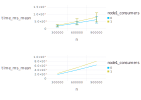

In [41]:
# difference between 2-consumer/1-node and 1-consumer/2-node
data = deepcopy(raw)
data10 = data[(data[:node1_consumers] .== 1).&(data[:node2_consumers] .== 0).|(data[:node2_consumers] .== 1).&(data[:node1_consumers] .== 0),:]
data10 = data10[:,[:node1_consumers, :n, :time_ms]]
data10 = aggregate(data10, [:node1_consumers, :n], [mean,minimum,maximum]) 
p1 = Gadfly.plot(data10, x=:n, y=:time_ms_mean, color=:node1_consumers, ymin=:time_ms_minimum, ymax=:time_ms_maximum, Scale.x_discrete, Geom.errorbar, Geom.line, Scale.color_discrete )
p2 = Gadfly.plot(data10, x=:n, y=:time_ms_mean, color=:node1_consumers, Geom.line, Scale.x_discrete, Scale.color_discrete )
vstack(p1,p2)
 

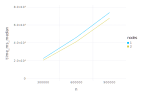

In [42]:
data = deepcopy(raw)

data = data[:,:]
data = data[:,[:nodes,:n,:time_ms]]
data = aggregate(data, [:nodes, :n], [ mean, median, maximum, minimum])

Gadfly.plot(data, x=:n, y=:time_ms_median, color=:nodes, Geom.line, Scale.x_discrete,  Scale.color_discrete)